In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('iris.data', header=None)

# Выделение признаков и меток
X = data.iloc[:, :4].to_numpy()
labels = data.iloc[:, 4].to_numpy()

# Преобразование текстовых меток в числовые
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

# Разбиение на обучающую и тестовую выборки (50% тест)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)


In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Количество неправильно классифицированных объектов
print("Количество ошибок классификации:", (y_test != y_pred).sum())

Количество ошибок классификации: 3


**Параметры классификатора LinearDiscriminantAnalysis**:
*   solver — алгоритм решения задачи. Возможные значения: `svd` (по умолчанию, не требует оценки ковариационной матрицы), `lsqr` и `eigen` (поддерживают shrinkage).
*   shrinkage — параметр регуляризации ковариационной матрицы, может быть `None`, `auto` или числом от 0 до 1.
*   priors — априорные вероятности классов, если не заданы, считаются равными частотам классов в обучающей выборке.
*   n_components — число компонент для снижения размерности.
*   store_covariance — сохранять ли ковариационную матрицу.
*   tol — порог для определения сингулярности матриц.

**Атрибуты после обучения**:
*   `coef_` — коэффициенты линейного дискриминанта.
*   `intercept_` — свободные члены.
*   `explained_variance_ratio_` — доля дисперсии, объяснённая каждой компонентой.
*   `means_` — центры классов.





In [4]:
accuracy = clf.score(X_test, y_test)
print("Точность классификации LDA:", accuracy)

Точность классификации LDA: 0.96


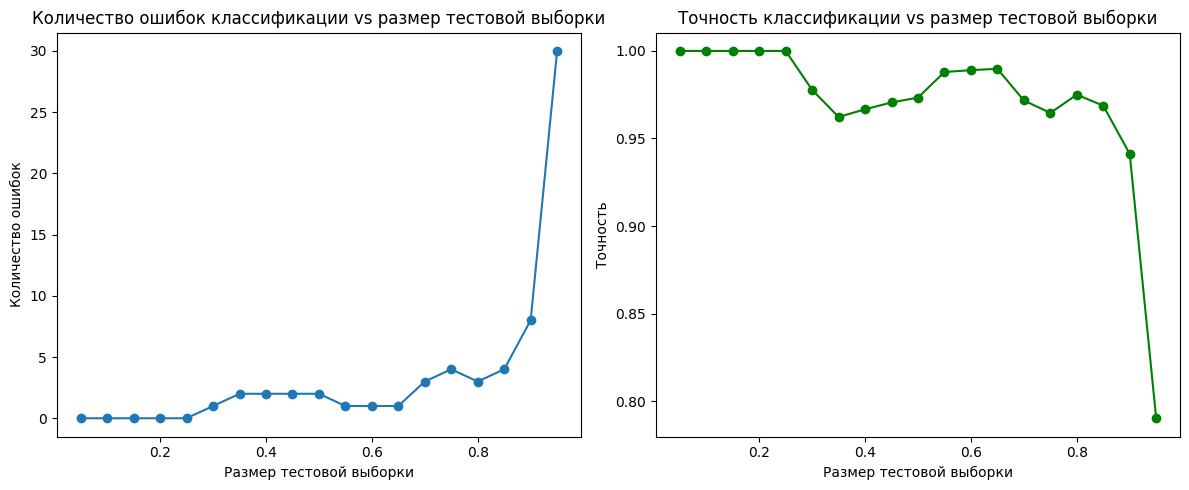

In [5]:
import matplotlib.pyplot as plt
import numpy as np

test_sizes = np.arange(0.05, 1.0, 0.05)
errors = []
accuracies = []
state = 455

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=state)
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    errors.append((y_test != y_pred).sum())
    accuracies.append(clf.score(X_test, y_test))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(test_sizes, errors, marker='o')
plt.title('Количество ошибок классификации vs размер тестовой выборки')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Количество ошибок')

plt.subplot(1,2,2)
plt.plot(test_sizes, accuracies, marker='o', color='green')
plt.title('Точность классификации vs размер тестовой выборки')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')

plt.tight_layout()
plt.show()


**Обоснование**:
При увеличении размера тестовой выборки количество ошибок растет (так как больше объектов), но точность обычно стабилизируется, поскольку модель обучается на меньшем количестве данных, что может снижать качество.

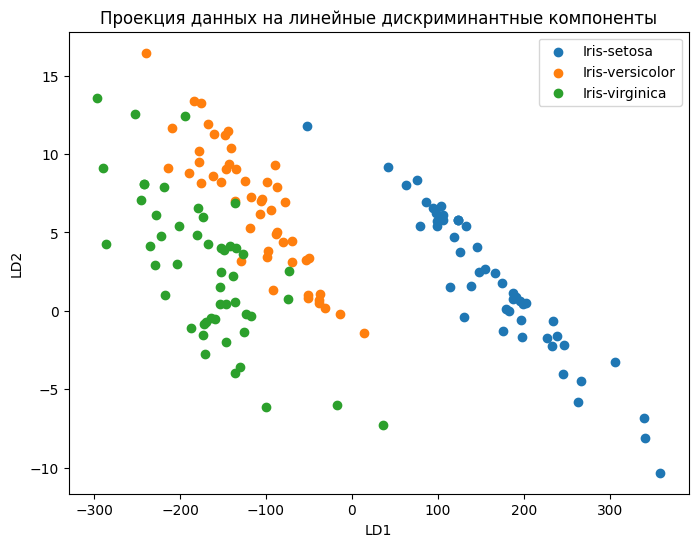

In [6]:
X_lda = clf.transform(X)

plt.figure(figsize=(8,6))
for label in np.unique(Y):
    plt.scatter(X_lda[Y == label, 0], X_lda[Y == label, 1] if X_lda.shape[1] > 1 else np.zeros_like(X_lda[Y == label, 0]),
                label=le.inverse_transform([label])[0])
plt.xlabel('LD1')
if X_lda.shape[1] > 1:
    plt.ylabel('LD2')
plt.title('Проекция данных на линейные дискриминантные компоненты')
plt.legend()
plt.show()

Функция `transform()` в LDA используется для проекции исходных данных на пространство линейных дискриминантных компонент, то есть для снижения размерности данных с сохранением информации, максимизирующей разделение классов.

In [7]:
# Пример исследования параметров
solvers = ['svd', 'lsqr', 'eigen']
shrinkages = [None, 'auto', 0.1, 0.5, 0.9]

for solver in solvers:
    for shrinkage in shrinkages:
        if solver == 'svd' and shrinkage is not None:
            # shrinkage не поддерживается для svd
            continue
        clf = LinearDiscriminantAnalysis(solver=solver, shrinkage=shrinkage)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'solver={solver}, shrinkage={shrinkage}, accuracy={score:.3f}')


solver=svd, shrinkage=None, accuracy=0.790
solver=lsqr, shrinkage=None, accuracy=0.790
solver=lsqr, shrinkage=auto, accuracy=0.951
solver=lsqr, shrinkage=0.1, accuracy=0.958
solver=lsqr, shrinkage=0.5, accuracy=0.937
solver=lsqr, shrinkage=0.9, accuracy=0.923
solver=eigen, shrinkage=None, accuracy=0.790
solver=eigen, shrinkage=auto, accuracy=0.951
solver=eigen, shrinkage=0.1, accuracy=0.958
solver=eigen, shrinkage=0.5, accuracy=0.937
solver=eigen, shrinkage=0.9, accuracy=0.923


/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_shrunk_covariance.py:349: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_empirical_cov

In [8]:
import numpy as np

# Кол-во классов
n_classes = len(np.unique(Y))
priors = np.full(n_classes, (1 - 0.7) / (n_classes - 1))
priors[1] = 0.7

clf = LinearDiscriminantAnalysis(priors=priors)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Точность с изменёнными априорными вероятностями:", accuracy)


Точность с изменёнными априорными вероятностями: 0.7902097902097902


Задание априорных вероятностей влияет на решение классификатора, смещая его в сторону класса с большей априорной вероятностью (класс 1). Это может повысить точность по этому классу, но снизить общую точность, если данные других классов хуже распознаются.

In [9]:
from sklearn import svm

clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print("Количество ошибок классификации SVM:", (y_test != y_pred_svm).sum())


Количество ошибок классификации SVM: 49


In [10]:
accuracy_svm = clf_svm.score(X_test, y_test)
print("Точность классификации SVM:", accuracy_svm)


Точность классификации SVM: 0.6573426573426573


In [11]:
print("Опорные векторы:\n", clf_svm.support_vectors_)
print("Индексы опорных векторов в обучающей выборке:\n", clf_svm.support_)
print("Количество опорных векторов для каждого класса:\n", clf_svm.n_support_)


Опорные векторы:
 [[5.1 3.8 1.9 0.4]
 [5.2 3.5 1.5 0.2]
 [5.1 3.7 1.5 0.4]
 [5.7 3.  4.2 1.2]
 [6.7 3.  5.2 2.3]
 [6.3 3.4 5.6 2.4]]
Индексы опорных векторов в обучающей выборке:
 [1 3 6 2 0 4]
Количество опорных векторов для каждого класса:
 [3 1 2]


*   `support_vectors_` — массив опорных векторов, которые определяют границу разделения классов.
*   `support_` — индексы этих опорных векторов в обучающей выборке.
*   `n_support_` — количество опорных векторов для каждого класса.

Количество опорных векторов зависит от сложности задачи, параметров модели (например, C, kernel), и данных.

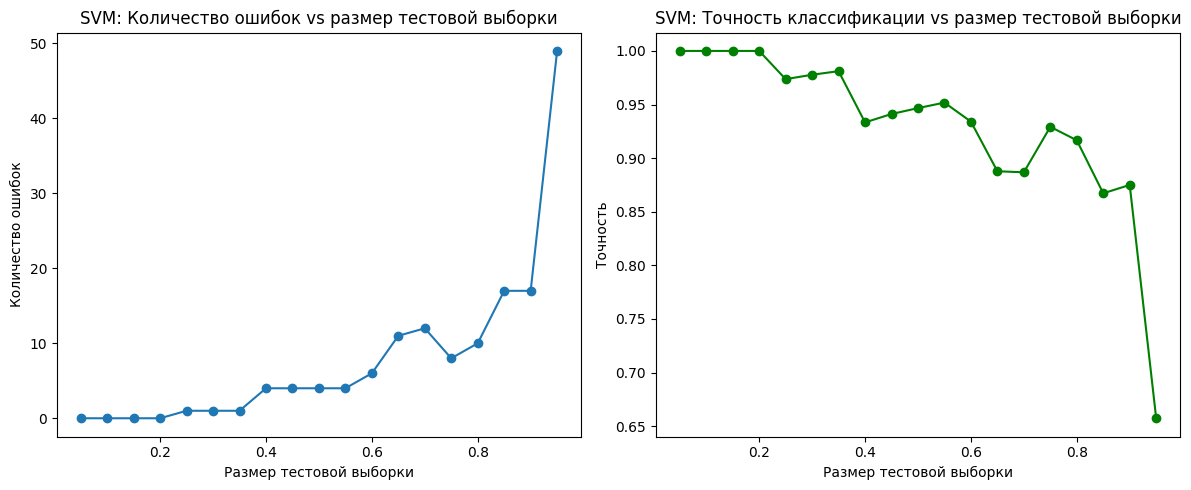

In [12]:
errors_svm = []
accuracies_svm = []

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=0)
    clf_svm = svm.SVC()
    clf_svm.fit(X_train, y_train)
    y_pred = clf_svm.predict(X_test)
    errors_svm.append((y_test != y_pred).sum())
    accuracies_svm.append(clf_svm.score(X_test, y_test))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(test_sizes, errors_svm, marker='o')
plt.title('SVM: Количество ошибок vs размер тестовой выборки')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Количество ошибок')

plt.subplot(1,2,2)
plt.plot(test_sizes, accuracies_svm, marker='o', color='green')
plt.title('SVM: Точность классификации vs размер тестовой выборки')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Точность')

plt.tight_layout()
plt.show()


Обоснование аналогично LDA: с ростом тестовой выборки ошибок становится больше, точность может изменяться в зависимости от объема обучающей выборки.

In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4]
max_iters = [100, 500, 1000]

for kernel in kernels:
    for degree in degrees if kernel == 'poly' else [3]:
        for max_iter in max_iters:
            clf_svm = svm.SVC(kernel=kernel, degree=degree, max_iter=max_iter)
            clf_svm.fit(X_train, y_train)
            score = clf_svm.score(X_test, y_test)
            print(f'kernel={kernel}, degree={degree}, max_iter={max_iter}, accuracy={score:.3f}')


kernel=linear, degree=3, max_iter=100, accuracy=0.930
kernel=linear, degree=3, max_iter=500, accuracy=0.930
kernel=linear, degree=3, max_iter=1000, accuracy=0.930
kernel=poly, degree=2, max_iter=100, accuracy=0.895
kernel=poly, degree=2, max_iter=500, accuracy=0.895
kernel=poly, degree=2, max_iter=1000, accuracy=0.895
kernel=poly, degree=3, max_iter=100, accuracy=0.860
kernel=poly, degree=3, max_iter=500, accuracy=0.860
kernel=poly, degree=3, max_iter=1000, accuracy=0.860
kernel=poly, degree=4, max_iter=100, accuracy=0.860
kernel=poly, degree=4, max_iter=500, accuracy=0.860
kernel=poly, degree=4, max_iter=1000, accuracy=0.860
kernel=rbf, degree=3, max_iter=100, accuracy=0.657
kernel=rbf, degree=3, max_iter=500, accuracy=0.657
kernel=rbf, degree=3, max_iter=1000, accuracy=0.657
kernel=sigmoid, degree=3, max_iter=100, accuracy=0.322
kernel=sigmoid, degree=3, max_iter=500, accuracy=0.322
kernel=sigmoid, degree=3, max_iter=1000, accuracy=0.322


In [14]:
from sklearn.svm import NuSVC, LinearSVC

# NuSVC
clf_nu = NuSVC(nu=0.1, random_state=455)
clf_nu.fit(X_train, y_train)
print("Точность NuSVC:", clf_nu.score(X_test, y_test))
print("Количество опорных векторов:", clf_nu.n_support_)

# LinearSVC
clf_linear = LinearSVC(max_iter=10000)
clf_linear.fit(X_train, y_train)
print("Точность LinearSVC:", clf_linear.score(X_test, y_test))



Точность NuSVC: 0.9300699300699301
Количество опорных векторов: [2 1 2]
Точность LinearSVC: 0.7832167832167832


*	SVC — классический SVM с ядровыми функциями, поддерживает различные ядра (rbf, poly, линейное и др.).
*	NuSVC — вариант SVM с параметром nu вместо C, который контролирует количество ошибок и опорных векторов.
*	LinearSVC — оптимизированный для линейных задач SVM, использует другой алгоритм оптимизации (liblinear), быстрее на больших данных, но не поддерживает ядровые функции.